In [107]:
# Import des packages 
import pandas as pd
import numpy as np
import sklearn
from scipy import sparse

# DataTable ne semble pas vouloir s installer dispo uniquement sur python 3.11
#import datatable


# Insérez votre code ici
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold   
from sklearn.model_selection import GridSearchCV



In [2]:
# On importe le dataset complet

# df = pd.read_csv("radio_tab.csv")

In [ ]:
# On cree un jeu de données réduit en respectant les proportions initiales 
#fraction = 0.1 # On prends 10% des données
#df_reduit = df.sample(frac=fraction)
#df_reduit.to_csv("radio_tab_10")

In [3]:
# On importe le jeu de données réduit

df = pd.read_csv("radio_tab_10")

In [21]:

df = df.head()

sns.countplot(df.TYPE)


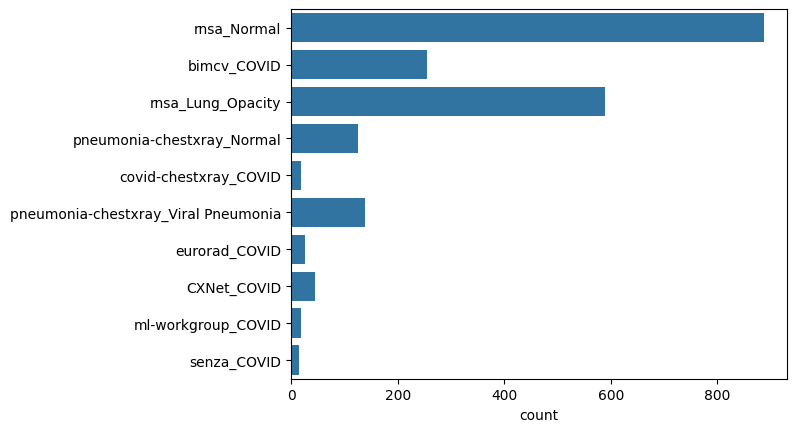

In [171]:
# On fait un X et Y 

X = df.iloc[:,7:]

sns.countplot(target)

target = df_reduit["URL"] + "_"  + df_reduit["TYPE"]

type = df_reduit["TYPE"]

source = df_reduit["URL"]


In [25]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,FORMAT,SIZE,URL,TYPE,num,0,1,2,...,89391,89392,89393,89394,89395,89396,89397,89398,89399,89400
0,14652,Normal-5025,PNG,256*256,rnsa,Normal,5025,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12347,Normal-2720,PNG,256*256,rnsa,Normal,2720,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8995,COVID-2984,PNG,256*256,bimcv,COVID,2984,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1406,Lung_Opacity-1407,PNG,256*256,rnsa,Lung_Opacity,1407,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,817,Lung_Opacity-818,PNG,256*256,rnsa,Lung_Opacity,818,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# On fait une ACP


In [190]:

pca = PCA(n_components = 20)

pca.fit(X)

data_2D = pca.fit_transform(X)

#fig = plt.figure()

import seaborn as sns 


# Avec les 5 premières composantes : 40% de la variabilité
print("Avec les 5 premieres composantes, on explique : ", pca.explained_variance_ratio_[:5].sum().round(3) * 100 , " % de la variabilité")

# Avec les 10 premières composantes 

print("Avec les 10 premieres composantes, on explique : ", pca.explained_variance_ratio_[:10].sum().round(3) * 100 , " % de la variabilité")


Avec les 5 premieres composantes, on explique :  40.400000000000006  % de la variabilité
Avec les 10 premieres composantes, on explique :  51.6  % de la variabilité


Text(0.5, 1.0, "Pourcentage de variance expliquée par les axes de l'ACP")

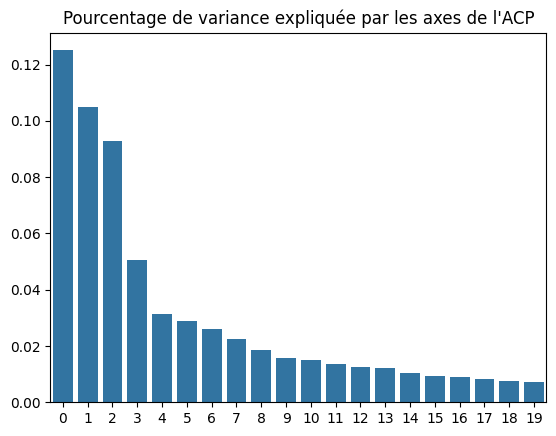

In [191]:
# Histogramme de l'ACP

sns.barplot(pca.explained_variance_ratio_)
plt.title("Pourcentage de variance expliquée par les axes de l'ACP")


Text(0.5, 1.0, "Pourcentage de variance cumulée expliquée par les axes de l'ACP")

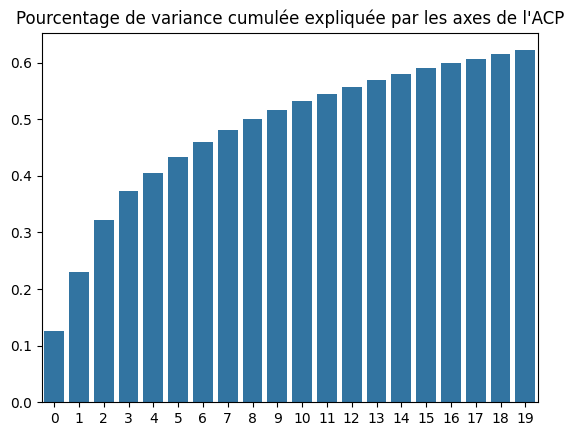

In [192]:

sns.barplot(pca.explained_variance_ratio_.cumsum())
plt.title("Pourcentage de variance cumulée expliquée par les axes de l'ACP")


Axe 1 et 2 de l'ACP

c:\Users\Inrae\anaconda3\envs\RadioPulmonaire\Lib\site-packages\seaborn\relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


La part de variance expliquée est 0.62


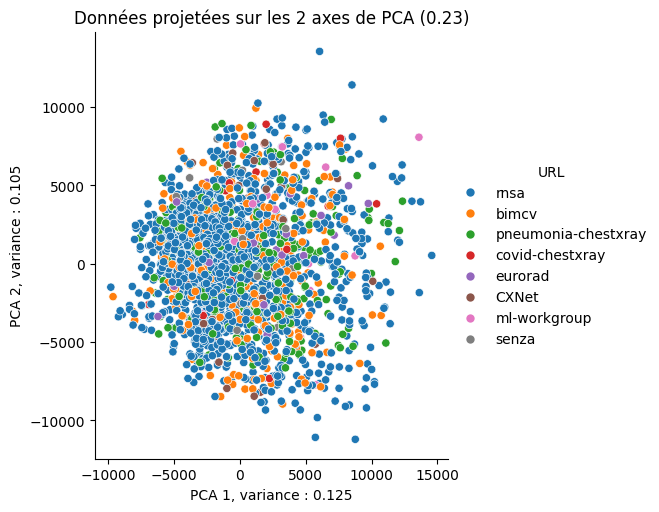

In [193]:
sns.relplot(x=data_2D[:, 0], y=data_2D[:, 1], hue = source, cmap=plt.cm.Spectral)

print("La part de variance expliquée est", round(pca.explained_variance_ratio_.sum(),2))

abcisse = 'PCA 1, variance : ' +  str(pca.explained_variance_ratio_[0].round(3))
ordonnées = 'PCA 2, variance : ' +  str(pca.explained_variance_ratio_[1].round(3))
plt.xlabel(abcisse)
plt.ylabel(ordonnées)

plt.title("Données projetées sur les 2 axes de PCA" + " (" + str(round(pca.explained_variance_ratio_[:2].sum(),2)) +")")
plt.show();

c:\Users\Inrae\anaconda3\envs\RadioPulmonaire\Lib\site-packages\seaborn\relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


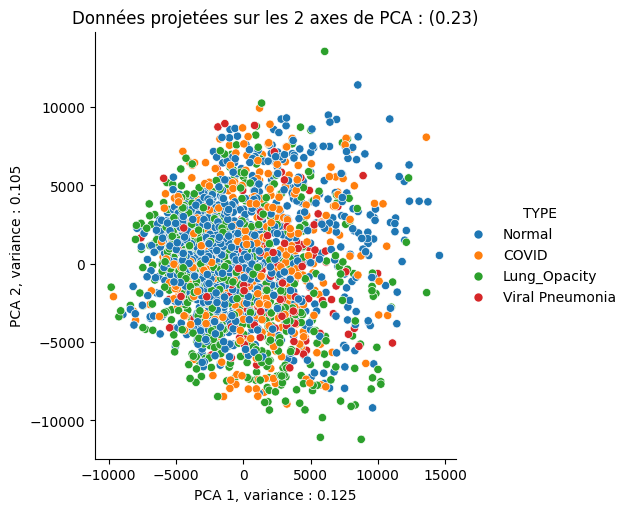

In [194]:
sns.relplot(x=data_2D[:, 0], y=data_2D[:, 1], hue = type, cmap=plt.cm.Spectral)

abcisse = 'PCA 1, variance : ' +  str(pca.explained_variance_ratio_[0].round(3))
ordonnées = 'PCA 2, variance : ' +  str(pca.explained_variance_ratio_[1].round(3))
plt.xlabel(abcisse)
plt.ylabel(ordonnées)

plt.title("Données projetées sur les 2 axes de PCA : (" + str(round(pca.explained_variance_ratio_[:2].sum(),2)) +")")
plt.show();

In [197]:
''' Ne fonctionne pas '''

# # On essaye de faire le graph des individus

# from sklearn.manifold import Isomap
# data = np.matrix(X) 
# data.shape

# def plot_components(data, model, images=None, ax=None,
#                     thumb_frac=0.05, cmap='gray_r', prefit = False):
#     ax = ax or plt.gca()
    
#     if not prefit :
#         proj = model.fit_transform(data)
#     else:
#         proj = data
#     ax.plot(proj[:, 0], proj[:, 1], '.b')
    
#     if images is not None:
#         min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
#         shown_images = np.array([2 * proj.max(0)])
#         for i in range(data.shape[0]):
#             dist = np.sum((proj[i] - shown_images) ** 2, 1)
#             if np.min(dist) < min_dist_2:
#                 # On ne montre pas le points trop proches
#                 continue
#             shown_images = np.vstack([shown_images, proj[i]])
#             imagebox = offsetbox.AnnotationBbox(
#                 offsetbox.OffsetImage(images[i], cmap=cmap),
#                                       proj[i])
#             #ax.add_artist(imagebox)


# fig, ax = plt.subplots(figsize=(10, 10))

# plot_components(data,
#                 model=Isomap(n_components=2),
#                 images=data.reshape((-1, 299, 299)),
#                 cmap = 'gray',
#                 thumb_frac = .1)

' Ne fonctionne pas '

Axe 3 et 4 de l'ACP

c:\Users\Inrae\anaconda3\envs\RadioPulmonaire\Lib\site-packages\seaborn\relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


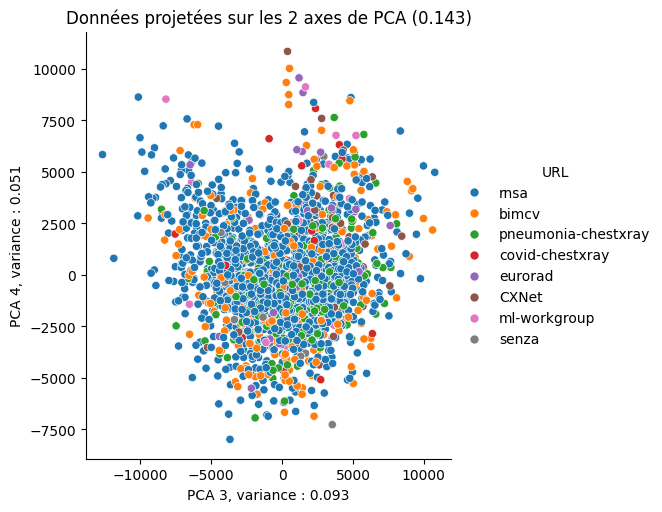

In [198]:
sns.relplot(x=data_2D[:, 2], y=data_2D[:, 3], hue = source, cmap=plt.cm.Spectral)

abcisse = 'PCA 3, variance : ' +  str(pca.explained_variance_ratio_[2].round(3))
ordonnées = 'PCA 4, variance : ' +  str(pca.explained_variance_ratio_[3].round(3))
plt.xlabel(abcisse)
plt.ylabel(ordonnées)

plt.title("Données projetées sur les 2 axes de PCA" + " (" + str((pca.explained_variance_ratio_[2] + pca.explained_variance_ratio_[3]).round(3)) +")")
plt.show();

c:\Users\Inrae\anaconda3\envs\RadioPulmonaire\Lib\site-packages\seaborn\relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


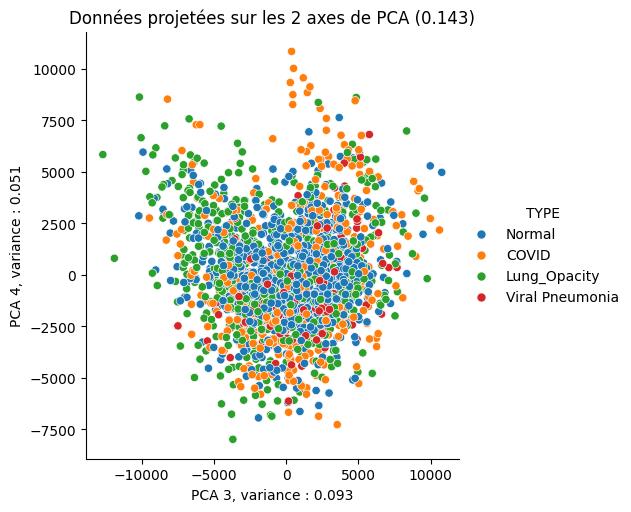

In [199]:
sns.relplot(x=data_2D[:, 2], y=data_2D[:, 3], hue = type, cmap=plt.cm.Spectral)

abcisse = 'PCA 3, variance : ' +  str(pca.explained_variance_ratio_[2].round(3))
ordonnées = 'PCA 4, variance : ' +  str(pca.explained_variance_ratio_[3].round(3))
plt.xlabel(abcisse)
plt.ylabel(ordonnées)

plt.title("Données projetées sur les 2 axes de PCA" + " (" + str((pca.explained_variance_ratio_[2] + pca.explained_variance_ratio_[3]).round(3)) +")")
plt.show();

In [134]:
# Test des modèles de classifications classiques
y = pd.get_dummies(type)

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

y = pd.get_dummies(target)


# On separe apprentissage et validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

# A voir en ajustant les parametres

y_pred = rf.predict(X_test)

#rf.score(y_test, y_pred)



In [98]:
cm = pd.crosstab(y_test, y_pred, rownames= ["donnees reelles"], colnames= ["donnees estimees"])
print(cm)

donnees estimees  COVID  Lung_Opacity  Normal  Viral Pneumonia
donnees reelles                                               
COVID                18            23      30                0
Lung_Opacity          2            75      35                0
Normal                7            18     187                0
Viral Pneumonia       0             4      11               14


In [137]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        47
           2       0.00      0.00      0.00         2
           3       1.00      0.14      0.25         7
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        25
           6       1.00      0.07      0.13        29
           7       0.81      0.49      0.61       112
           8       0.76      0.55      0.64       187
           9       0.00      0.00      0.00         5

   micro avg       0.78      0.38      0.51       424
   macro avg       0.36      0.12      0.16       424
weighted avg       0.63      0.38      0.45       424
 samples avg       0.38      0.38      0.38       424



c:\Users\Inrae\anaconda3\envs\RadioPulmonaire\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Inrae\anaconda3\envs\RadioPulmonaire\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [141]:
# On cherche à optimiser les paramètres de la foret aléatoire

params = {
# Number of trees in random forest
"n_estimators" : [100, 200, 300, 400, 500, 600, 700, 800, 900]
}

crossval = KFold(n_splits = 3, random_state = 42, shuffle = True)

grid = GridSearchCV(estimator = rf, param_grid = params, cv=crossval, scoring = 'accuracy')
grid.fit(X_train, y_train)
print(grid.best_params_)


# alpha_grid = {'alpha':[1/i for i in range(1,10)]}
# grid = GridSearchCV(estimator = lasso, param_grid = alpha_grid, cv=crossval, scoring = 'neg_mean_squared_error')
# grid.fit(X_train, y_train)
# print(grid.best_params_)


{'n_estimators': 200}


In [144]:
# On reapplique le meilleur  de rf
rf = RandomForestClassifier(n_estimators = 200)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [145]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        47
           2       0.00      0.00      0.00         2
           3       1.00      0.14      0.25         7
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        25
           6       1.00      0.17      0.29        29
           7       0.81      0.48      0.60       112
           8       0.74      0.53      0.62       187
           9       0.00      0.00      0.00         5

   micro avg       0.77      0.38      0.51       424
   macro avg       0.35      0.13      0.18       424
weighted avg       0.62      0.38      0.46       424
 samples avg       0.38      0.38      0.38       424



c:\Users\Inrae\anaconda3\envs\RadioPulmonaire\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Inrae\anaconda3\envs\RadioPulmonaire\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [126]:

print(grid.best_params_)

{'n_estimators': 2}


c:\Users\Inrae\anaconda3\envs\RadioPulmonaire\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [    0     1     2 ... 89398 89399 89400] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Inrae\anaconda3\envs\RadioPulmonaire\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Text(0.5, 1.0, 'Masque en conservant les 90% de variables les plus importantes')

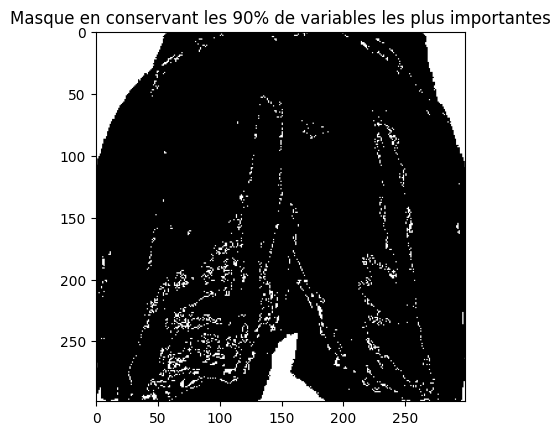

In [179]:
# On regarde si certaines zones sont plus variable que d'autre sur les images
# Ce n est pas applicable a du multilabel, on comparera juste COVID ou non

from sklearn.feature_selection import SelectPercentile

cible = np.where(type=="COVID",1,0)


# # On utilise variance threshold pour supprimer les variables qui ne varient pas 

# from sklearn.feature_selection import VarianceThreshold

# sel = VarianceThreshold(threshold=1e-6)

# X2 = sel.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, cible, test_size = .2, random_state = 84, shuffle = True)

sel = SelectPercentile(percentile = 90)
sel.fit(X_train, y_train)

plt.imshow(sel.get_support().reshape(299,299), cmap = 'gray_r');

plt.title("Masque en conservant les 90% de variables les plus importantes")

c:\Users\Inrae\anaconda3\envs\RadioPulmonaire\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [    0     1     2 ... 89398 89399 89400] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Inrae\anaconda3\envs\RadioPulmonaire\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


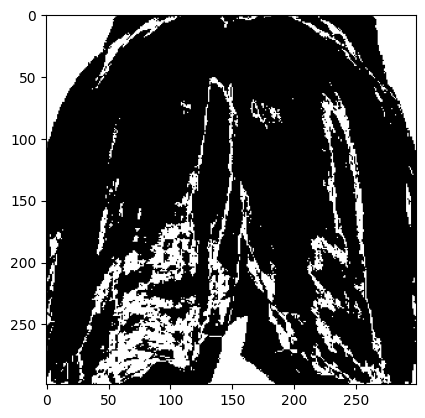

In [177]:

sel = SelectPercentile(percentile = 80)
sel.fit(X_train, y_train)

plt.imshow(sel.get_support().reshape(299,299), cmap = 'gray_r');

plt.title("Masque en conservant les 80% de variables les plus importantes")

c:\Users\Inrae\anaconda3\envs\RadioPulmonaire\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [    0     1     2 ... 89398 89399 89400] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Inrae\anaconda3\envs\RadioPulmonaire\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


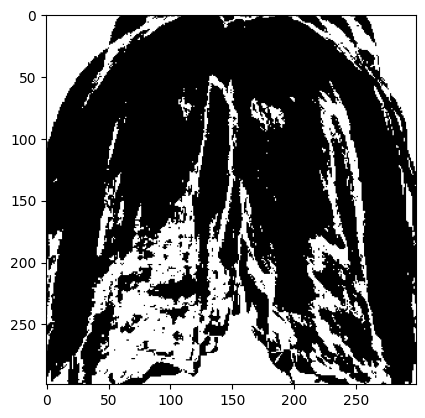

In [178]:
sel = SelectPercentile(percentile = 70)
sel.fit(X_train, y_train)

plt.imshow(sel.get_support().reshape(299,299), cmap = 'gray_r');
plt.title("Masque en conservant les 70% de variables les plus importantes")